# Sales and Advertisment
### What it is about?
This project is about the prediction of sales based on the advertisment budget and uses Kaggle website for its dataset.
### Process
1. import libraries
2. connect the datset
3. see the trend of the over all data
4. draw pairplot to see about the distribution, any relation between each variables
5. draw a correlation matrix to see all correlation coffecients between variables
6. calculate the model intercepts and coefficients
7. compare the prediction with the actual values
8. draw Residual Plot to see the difference of the pridicted and actual value
9. model error calculation
10. prepare a function to make predictions
11. save the model
12. save the feature names
13. create the app by using streamlit

In [1]:
import pandas as pd
import numpy as np
import joblib
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

In [2]:
df = pd.read_csv('Advertising Budget and Sales.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV Ad Budget ($),200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio Ad Budget ($),200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper Ad Budget ($),200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales ($),200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


Text(0.5, 1, 'Pairplot of Advertising Data')

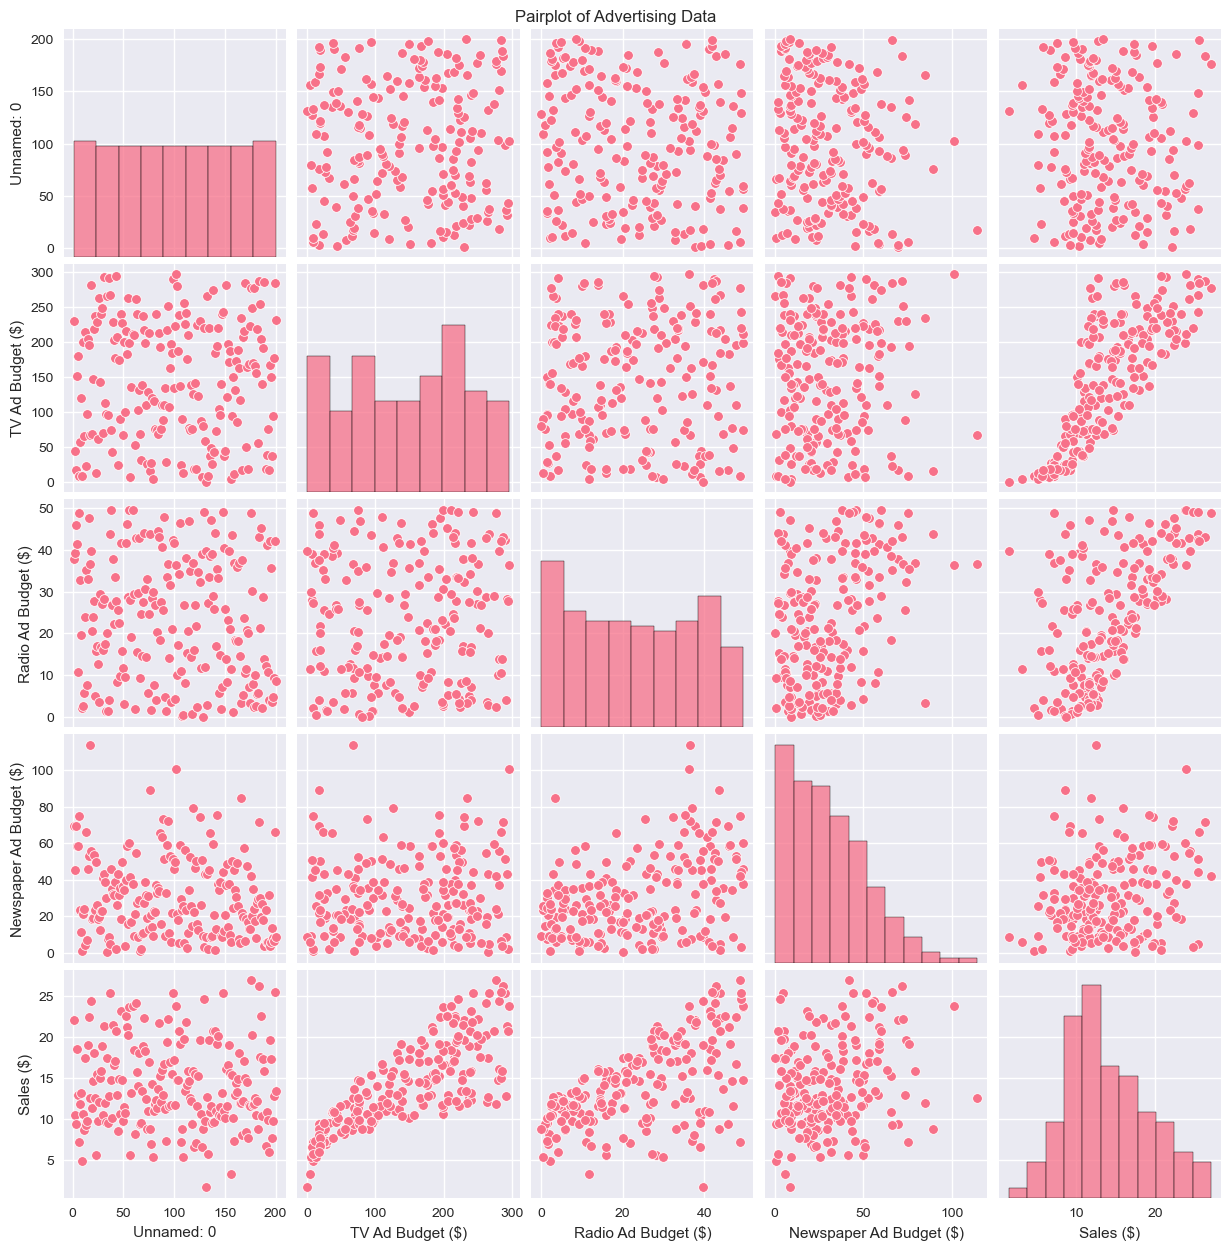

In [4]:
sns.pairplot(df, diag_kind='hist')
plt.suptitle('Pairplot of Advertising Data', y=1)

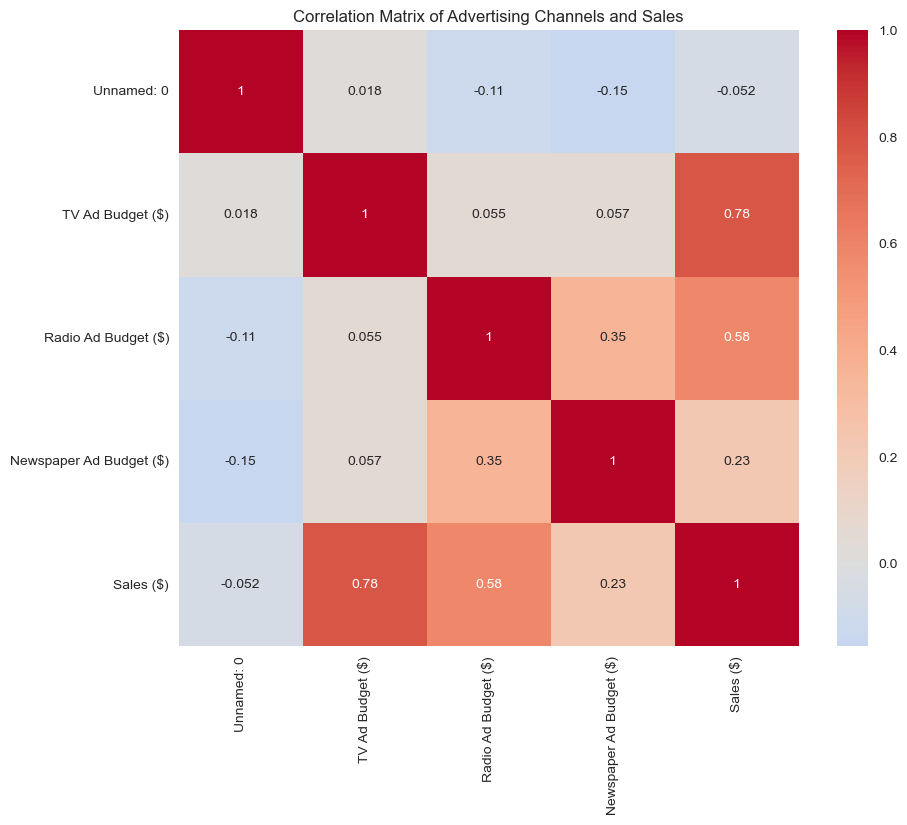

In [5]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Advertising Channels and Sales')
plt.show()

In [6]:
X = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']] 
y = df['Sales ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("Model Coefficients:")
print("Intercept:", model.intercept_)
print("TV Coefficient:", model.coef_[0])
print("Radio Coefficient:", model.coef_[1])
print("Newspaper Coefficient:", model.coef_[2])

Model Coefficients:
Intercept: 2.979067338122629
TV Coefficient: 0.044729517468716326
Radio Coefficient: 0.18919505423437655
Newspaper Coefficient: 0.0027611143413671757


In [7]:
y_pred = model.predict(X_test)

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred})

results.head(5)

,Actual,Predicted,Difference
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627


Text(0.5, 1.0, 'Actual vs Predicted Sales')

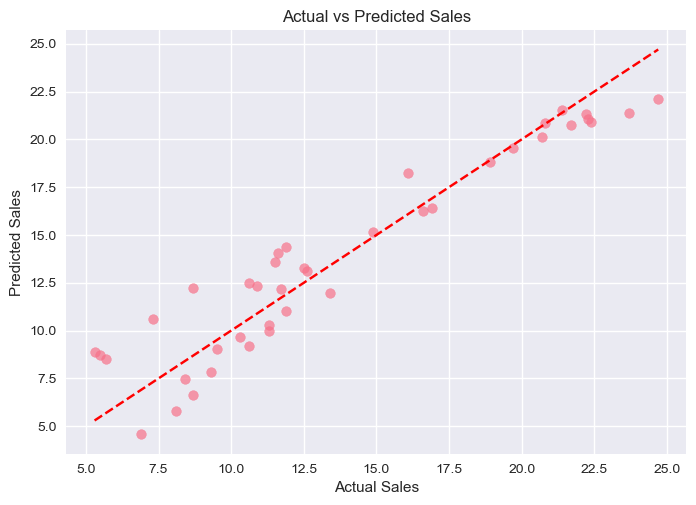

In [8]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')

Text(0.5, 1.0, 'Residual Plot')

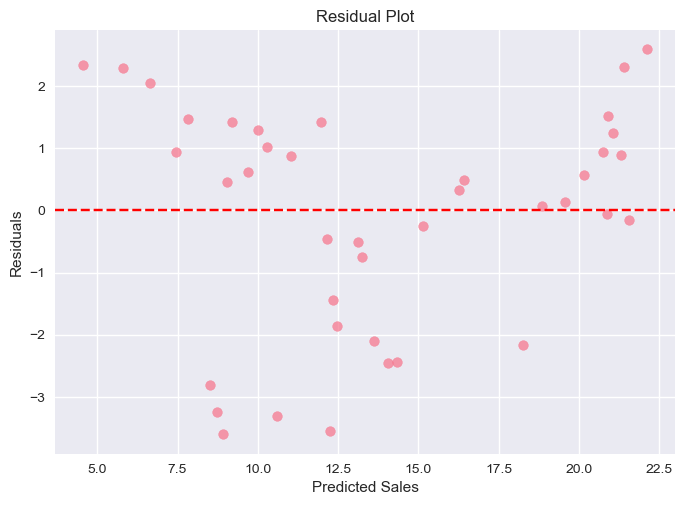

In [9]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')

In [10]:
# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error : {mae:.4f}")
print(f"Mean Squared Error : {mse:.4f}")
print(f"Root Mean Squared Error : {rmse:.4f}")
print(f"R-squared (R²) Error : {r2:.4f}")

Mean Absolute Error : 1.4608
Mean Squared Error : 3.1741
Root Mean Squared Error : 1.7816
R-squared (R²) Error : 0.8994


In [11]:
def predict_sales(tv_budget, radio_budget, newspaper_budget):
    input_data = np.array([[tv_budget, radio_budget, newspaper_budget]])
    prediction = model.predict(input_data)
    return prediction[0]

In [12]:
joblib.dump(model, 'sales_prediction_model.pkl')

feature_names = {
    'features': X.columns.tolist()
}
with open('model_features.json', 'w') as f:
    json.dump(feature_names, f)